In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])    

550378/550378 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
     

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
     

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 85ms/step - loss: 2.9166 - accuracy: 0.4921 - val_loss: 2.0382 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 68ms/step - loss: 1.6691 - accuracy: 0.6647 - val_loss: 1.4639 - val_accuracy: 0.6720
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.2444 - accuracy: 0.7255 - val_loss: 1.2361 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 1.0153 - accuracy: 0.7795 - val_loss: 1.1159 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.8451 - accuracy: 0.8191 - val_loss: 1.0415 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.7044 - accuracy: 0.8499 - val_loss: 0.9665 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 65ms/step - loss: 0.5895 - accuracy: 0.8776 - val_loss: 0.9376 - val_accuracy: 0.7980
Epoch 8/20
16

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

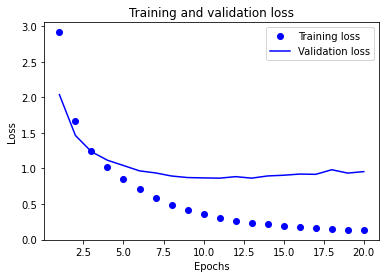

In [11]:
import matplotlib.pyplot as plt
  
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

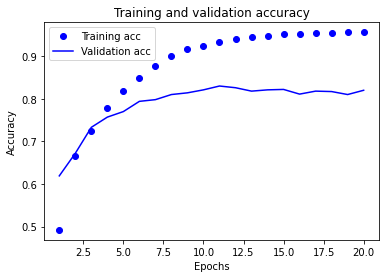

In [12]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 79ms/step - loss: 2.7837 - accuracy: 0.4731 - val_loss: 1.9063 - val_accuracy: 0.6000
Epoch 2/9
16/16 [==============================] - 1s 60ms/step - loss: 1.5991 - accuracy: 0.6581 - val_loss: 1.3971 - val_accuracy: 0.6860
Epoch 3/9
16/16 [==============================] - 1s 61ms/step - loss: 1.1931 - accuracy: 0.7405 - val_loss: 1.1942 - val_accuracy: 0.7360
Epoch 4/9
16/16 [==============================] - 1s 60ms/step - loss: 0.9633 - accuracy: 0.7902 - val_loss: 1.0655 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 1s 58ms/step - loss: 0.7911 - accuracy: 0.8297 - val_loss: 0.9918 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 1s 61ms/step - loss: 0.6542 - accuracy: 0.8634 - val_loss: 0.9515 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 60ms/step - loss: 0.5461 - accuracy: 0.8881 - val_loss: 0.9171 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

In [14]:
results

[0.9653967022895813, 0.7787176966667175]

In [15]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 9ms/step
